In [1]:
# coding=utf-8
import pandas as pd
import csv  # Import csv
import tweepy
import re
import string
import nltk
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
pd.set_option('display.max_colwidth',1000)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [2]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

import codecs
df = pd.read_csv('FinalListPreprocessedData.csv', header = None, encoding='utf-8', engine='python')
df = df.dropna()
df.columns = ['ID','User','CREATED_AT','LABEL','stemming_words','LIKE COUNT','FOLLOWER COUNT']
df = df.iloc[1: , :] # start from first column
df.head()

,ID,User,CREATED_AT,LABEL,stemming_words,LIKE COUNT,FOLLOWER COUNT
2,3.0,1.42E+18,7/27/2021 10:40,Politics,ද්විපාර්ශවික එකඟතා ජන ජීවිත සෞඛ්යය මනාව ආරක්ෂා කරමින් හැකි ඉක්මණින් ආර්ථිකය,10,13898
3,4.0,1.42E+18,7/25/2021 20:56,Other,කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හට යුරෝපීය රට වලට විසා නිකුත් නොකි,0,87
4,5.0,1.42E+18,7/25/2021 20:53,Other,කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හට යුර,0,87
5,6.0,1.42E+18,7/25/2021 20:52,Other,කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හට,1,87
6,7.0,1.42E+18,7/25/2021 20:52,Other,කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හට යුරෝපීය රට වලට විසා නිකුත් නොක,0,87


In [3]:
df.loc[df['LABEL']=='Crime',"LABEL"] = 0
df.loc[df['LABEL']=='Entertainment',"LABEL"] = 1
df.loc[df['LABEL']=='Politics',"LABEL"] = 3
df.loc[df['LABEL']=='Sport',"LABEL"] = 4
df.loc[df['LABEL']=='Other',"LABEL"] = 5

In [4]:
import matplotlib.pyplot as plt
classes = df.LABEL.unique()
counts = []

for i in classes:
    count = len(df[df.LABEL==i])
    counts.append(count)

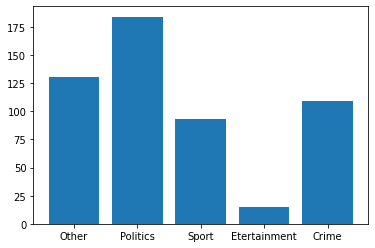

In [5]:
plt.bar(['Other','Politics','Sport','Etertainment','Crime'], counts)
plt.show()

In [6]:
########## vectorizer ######################

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df['stemming_words'],df['LABEL'],random_state=42)

In [8]:
#print(x_train)

In [9]:
#print(y_train)

In [10]:
####### Bag of word ###########

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

clf.fit(X_train_tfidf,y_train)

from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer(analyzer = 'word', max_features = 10000, ngram_range=(1,2))),
                     ('clf', LinearSVC()),
])
#
# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

predictions = text_clf.predict(X_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

print(metrics.classification_report(y_test,predictions))


In [29]:
text_clf.fit(x_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                ('model', LogisticRegression())])

In [31]:
predictions = text_clf.predict(x_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

print(metrics.classification_report(y_test,predictions))

ValueError: Classification metrics can't handle a mix of unknown and multiclass targets

In [12]:
#vect.get_feature_names()

In [13]:
len(vect.get_feature_names())

4702

In [14]:
x_train_vectorized = vect.transform(x_train)

In [15]:
x_train_vectorized

<398x4702 sparse matrix of type '<class 'numpy.float64'>'
	with 9705 stored elements in Compressed Sparse Row format>

In [16]:
# print(x_train_vectorized)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:

y_train = y_train.astype('int')
model.fit(x_train_vectorized,y_train)


LogisticRegression()

In [19]:
predictions = model.predict(vect.transform(x_test))

In [20]:
print(predictions)

[0 5 0 5 0 5 3 3 0 5 3 5 5 5 5 5 5 3 0 0 5 4 3 5 5 0 4 3 0 3 5 3 5 3 5 3 0
 3 3 3 5 5 5 5 0 3 5 5 3 5 3 0 3 4 3 3 0 4 5 0 0 4 4 5 5 5 4 3 5 5 5 5 0 5
 3 5 0 5 0 3 0 5 0 5 5 5 5 3 5 5 3 3 5 5 3 3 5 5 3 5 0 0 3 5 0 3 0 5 5 3 5
 3 5 5 0 5 0 3 3 5 0 0 5 5 3 3 5 3 4 5 5 0 3]


In [21]:
actual = np.array(y_test)
actual

array([0, 5, 0, 4, 0, 1, 0, 5, 0, 5, 5, 5, 5, 0, 4, 0, 5, 5, 0, 3, 5, 1,
       5, 5, 5, 0, 3, 4, 0, 3, 4, 5, 5, 3, 5, 3, 0, 5, 0, 3, 3, 4, 3, 5,
       0, 3, 5, 5, 0, 5, 3, 0, 0, 4, 5, 3, 0, 4, 5, 0, 0, 4, 4, 5, 5, 5,
       1, 3, 5, 5, 4, 5, 0, 5, 0, 4, 0, 3, 0, 3, 0, 4, 0, 4, 5, 4, 3, 5,
       4, 5, 3, 3, 5, 4, 3, 3, 5, 5, 3, 5, 0, 0, 3, 4, 5, 4, 0, 4, 3, 4,
       3, 5, 5, 5, 0, 0, 0, 4, 3, 3, 0, 0, 5, 5, 3, 5, 3, 3, 4, 4, 5, 0,
       3], dtype=object)

In [22]:
count = 0
for i in range (len(predictions)):
    if predictions[i] == actual[i]:
        count = count +1

In [23]:
count #correct prediction

83

In [24]:
len(predictions) #total prediction

133

In [25]:
85/133 ###### probbility

0.6390977443609023